## Overview
I quickly went through and did some basic cleaning. I checked correlations using a heatmap and got a better look at the correlated features with a pairplot. I ran a basic oridinary least squares regression for a baseline model and was able to account for approx. 27% of the variance. All of which is statistically significant expect chlorides. 

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm

In [2]:
df = pd.read_csv('winequalityN.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [19]:
columns = {}
# I dont like spaces in my column names so I replaced them with underscores
for column in df.columns:
    columns[column] = column.replace(" ", "_")
df.rename(columns=columns, inplace=True)

In [20]:
df.info()
# checked for NA values and found very few.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed_acidity         6487 non-null   float64
 2   volatile_acidity      6489 non-null   float64
 3   citric_acid           6494 non-null   float64
 4   residual_sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free_sulfur_dioxide   6497 non-null   float64
 7   total_sulfur_dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


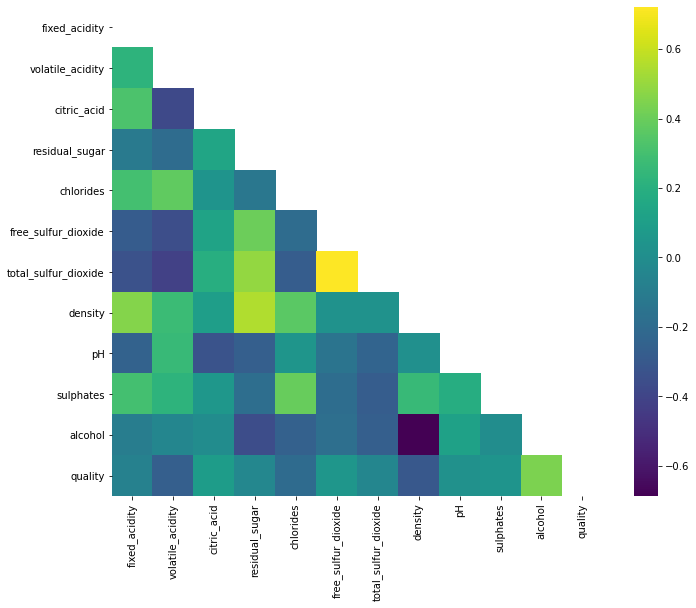

In [21]:
nonas = df.dropna()
# Decided to drop all NA values becuase there was so few and they are spread out
corr = nonas.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Created a heatmap using Seaborn to get an overview of correlations that looks pretty

fig1, ax1 = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, ax=ax1, cmap="viridis");

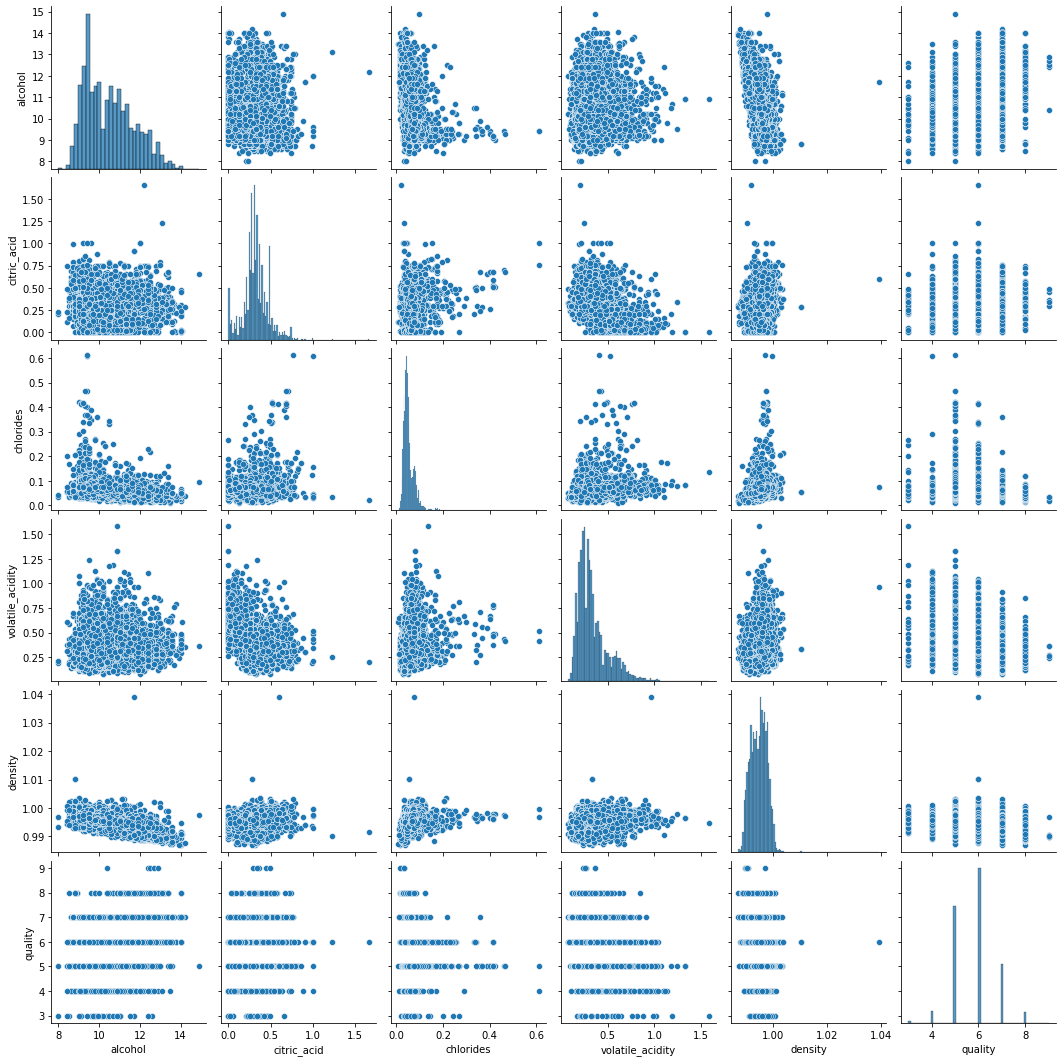

In [26]:
correl = ["alcohol", "citric_acid", "chlorides", "volatile_acidity", "density", 'quality']
df_correl = nonas[correl]
# Used seaborns pairplot to quickly generate distributions and scatterplots. 
sns.pairplot(df_correl);

In [45]:
def create_basic_formula(target : str, features : list):
    """
    Takes in a target and list of features to create a ordinary least squares formula using only addition
    """
    formula = target + ' ~ '
    for feature in features:
        add = feature + ' + '
        formula += add
    return formula[:-3]
    

In [42]:
formula = create_basic_formula('quality', ["alcohol", "citric_acid", "chlorides", "volatile_acidity", "density"])
formula

'quality ~ alcohol + citric_acid + chlorides + volatile_acidity + density'

In [36]:
results = sm.ols(formula=formula, data=nonas).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     475.8
Date:                Mon, 28 Mar 2022   Prob (F-statistic):               0.00
Time:                        17:41:14   Log-Likelihood:                -7280.7
No. Observations:                6463   AIC:                         1.457e+04
Df Residuals:                    6457   BIC:                         1.461e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -40.5753      4.795     -8.461      0.000     -49.976     -31.175
alcohol              0.3907      0.011     34.735      0.000       0.369       0.413
citric_acid         -0.2215      0.073     -3.021      0.003      -0.365      -0.078
chlorides           -0.0602      0.305     -0.197      0.843      -0.658       0.538
volatile_acidity    -1.5855      0.072    -22.001      0.000      -1.727      -1.444
density             43.1358      4.754      9.073      0.000      33.816      52.455
==============================================================================
Omnibus:                      114.717   Durbin-Watson:                   1.656
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.216
Skew:                          -0.004   Prob(JB):                     1.38e-51
Kurtosis:                       3.933   Cond. No.                     7.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""